# 0. 문제 정의

- 가속, 무게, 배기량이 연비에 미치는 영향

# 1. 사전준비

In [149]:
%matplotlib inline

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

# 2. 파일 읽고 데이터프레임 생성

In [19]:
df = pd.read_csv( 'auto-mpg.csv', header = None )
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'aceeleration', 'model', 'origin', 'carname']

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,aceeleration,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


# 3. 전처리 및 데이터프레임 분석

- 마력 값이 '?'인 행 삭제

In [107]:
m = df[df['horsepower']=='?'].index
m
df = df.drop(m)
df

,mpg,cylinders,displacement,horsepower,weight,aceeleration,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 데이터프레임 정보

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   aceeleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### 데이터프레임 기본통계

In [109]:
df.describe()

,mpg,cylinders,displacement,weight,aceeleration,model,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 4. EDA

## 항목별 (평균, 최대값, 최소값) 그룹화

### 실린더 기준

In [112]:
df10 = df.drop( ['carname','model','origin' ], axis = 1)
df10

,mpg,cylinders,displacement,horsepower,weight,aceeleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6
394,44.0,4,97.0,52.00,2130.0,24.6
395,32.0,4,135.0,84.00,2295.0,11.6
396,28.0,4,120.0,79.00,2625.0,18.6


In [113]:
df10.groupby(by=['cylinders'], as_index=False).mean()

,cylinders,mpg,displacement,weight,aceeleration
0,3,20.550000,72.500000,2398.500000,13.250000
1,4,29.283920,109.670854,2305.110553,16.581910
2,5,27.366667,145.000000,3103.333333,18.633333
3,6,19.973494,218.361446,3202.120482,16.254217
4,8,14.963107,345.009709,4114.718447,12.955340


In [114]:
df10.groupby(by=['cylinders'], as_index=False).max()

,cylinders,mpg,displacement,horsepower,weight,aceeleration
0,3,23.7,80.0,97.00,2720.0,13.5
1,4,46.6,156.0,98.00,3270.0,24.8
2,5,36.4,183.0,77.00,3530.0,20.1
3,6,38.0,262.0,98.00,3907.0,21.0
4,8,26.6,455.0,90.00,5140.0,22.2


In [115]:
df10.groupby(by=['cylinders'], as_index=False).min()

,cylinders,mpg,displacement,horsepower,weight,aceeleration
0,3,18.0,70.0,100.0,2124.0,12.5
1,4,18.0,68.0,100.0,1613.0,11.6
2,5,20.3,121.0,103.0,2830.0,15.9
3,6,15.0,145.0,100.0,2472.0,11.3
4,8,9.0,260.0,105.0,3086.0,8.0


### origin 기준

In [116]:
df11 = df.drop( ['carname','model','cylinders' ], axis = 1)
df11

,mpg,displacement,horsepower,weight,aceeleration,origin
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1
...,...,...,...,...,...,...
393,27.0,140.0,86.00,2790.0,15.6,1
394,44.0,97.0,52.00,2130.0,24.6,2
395,32.0,135.0,84.00,2295.0,11.6,1
396,28.0,120.0,79.00,2625.0,18.6,1


In [117]:
df10.groupby(by=['cylinders'], as_index=False).mean()

,cylinders,mpg,displacement,weight,aceeleration
0,3,20.550000,72.500000,2398.500000,13.250000
1,4,29.283920,109.670854,2305.110553,16.581910
2,5,27.366667,145.000000,3103.333333,18.633333
3,6,19.973494,218.361446,3202.120482,16.254217
4,8,14.963107,345.009709,4114.718447,12.955340


In [118]:
df10.groupby(by=['cylinders'], as_index=False).min()

,cylinders,mpg,displacement,horsepower,weight,aceeleration
0,3,18.0,70.0,100.0,2124.0,12.5
1,4,18.0,68.0,100.0,1613.0,11.6
2,5,20.3,121.0,103.0,2830.0,15.9
3,6,15.0,145.0,100.0,2472.0,11.3
4,8,9.0,260.0,105.0,3086.0,8.0


In [119]:
df10.groupby(by=['cylinders'], as_index=False).max()

,cylinders,mpg,displacement,horsepower,weight,aceeleration
0,3,23.7,80.0,97.00,2720.0,13.5
1,4,46.6,156.0,98.00,3270.0,24.8
2,5,36.4,183.0,77.00,3530.0,20.1
3,6,38.0,262.0,98.00,3907.0,21.0
4,8,26.6,455.0,90.00,5140.0,22.2


### origin 기준

In [120]:
df12 = df.drop( ['carname','origin','cylinders' ], axis = 1)
df12

,mpg,displacement,horsepower,weight,aceeleration,model
0,18.0,307.0,130.0,3504.0,12.0,70
1,15.0,350.0,165.0,3693.0,11.5,70
2,18.0,318.0,150.0,3436.0,11.0,70
3,16.0,304.0,150.0,3433.0,12.0,70
4,17.0,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,27.0,140.0,86.00,2790.0,15.6,82
394,44.0,97.0,52.00,2130.0,24.6,82
395,32.0,135.0,84.00,2295.0,11.6,82
396,28.0,120.0,79.00,2625.0,18.6,82


### 모델 기준

In [121]:
df12.groupby(by=['model'], as_index=False).mean()

,model,mpg,displacement,weight,aceeleration
0,70,17.689655,281.413793,3372.793103,12.948276
1,71,21.111111,213.888889,3030.592593,15.000000
2,72,18.714286,218.375000,3237.714286,15.125000
3,73,17.100000,256.875000,3419.025000,14.312500
4,74,22.769231,170.653846,2878.038462,16.173077
5,75,20.266667,205.533333,3176.800000,16.050000
6,76,21.573529,197.794118,3078.735294,15.941176
7,77,23.375000,191.392857,2997.357143,15.435714
8,78,24.061111,177.805556,2861.805556,15.805556
9,79,25.093103,206.689655,3055.344828,15.813793


In [122]:
df12.groupby(by=['model'], as_index=False).min()

,model,mpg,displacement,horsepower,weight,aceeleration
0,70,9.0,97.0,113.0,1835.0,8.0
1,71,12.0,71.0,100.0,1613.0,11.5
2,72,11.0,70.0,112.0,2100.0,11.0
3,73,11.0,68.0,100.0,1867.0,9.5
4,74,13.0,71.0,100.0,1649.0,13.5
5,75,13.0,90.0,100.0,1795.0,11.5
6,76,13.0,85.0,100.0,1795.0,12.0
7,77,15.0,79.0,100.0,1825.0,11.1
8,78,16.2,78.0,100.0,1800.0,11.2
9,79,15.5,85.0,110.0,1915.0,11.3


In [123]:
df12.groupby(by=['model'], as_index=False).max()

,model,mpg,displacement,horsepower,weight,aceeleration
0,70,27.0,455.0,97.00,4732.0,20.5
1,71,35.0,400.0,95.00,5140.0,20.5
2,72,28.0,429.0,97.00,4633.0,23.5
3,73,29.0,455.0,95.00,4997.0,21.0
4,74,32.0,350.0,97.00,4699.0,21.0
5,75,33.0,400.0,98.00,4668.0,21.0
6,76,33.0,351.0,95.00,4380.0,22.2
7,77,36.0,400.0,98.00,4335.0,19.0
8,78,43.1,318.0,97.00,4080.0,21.5
9,79,37.3,360.0,90.00,4360.0,24.8


### 각 조건별 

#### mpg

In [144]:
print( 'mpg가 가장 높은 차 이름  : {:}'.format( dfm1[8] ) ) 
print( 'mpg  : {:}'.format( dfm1[0] ) ) 
print()
print( 'mpg가 가장 낮은 차 이름  : {:}'.format( dfm2[8] ) ) 
print( 'mpg  : {:}'.format( dfm2[0] ) ) 

mpg가 가장 높은 차 이름  : mazda glc
mpg  : 46.6

mpg가 가장 낮은 차 이름  : hi 1200d
mpg  : 9.0


In [125]:
dfm1 = df.iloc[df['mpg'].rank(method='min').argmax()]
dfm1

mpg                  46.6
cylinders               4
displacement           86
horsepower          65.00
weight               2110
aceeleration         17.9
model                  80
origin                  3
carname         mazda glc
Name: 322, dtype: object

In [126]:
dfm2 = df.iloc[df['mpg'].rank(method='min').argmin()]
dfm2

mpg                    9
cylinders              8
displacement         304
horsepower         193.0
weight              4732
aceeleration        18.5
model                 70
origin                 1
carname         hi 1200d
Name: 28, dtype: object

#### displacement

In [143]:
print( 'displacement가 가장 높은 차 이름  : {:}'.format( dfd1[8] ) ) 
print( 'displacement  : {:}'.format( dfd1[0] ) ) 
print()
print( 'displacement가 가장 낮은 차 이름  : {:}'.format( dfd2[8] ) ) 
print( 'displacement  : {:}'.format( dfd2[0] ) ) 

displacement가 가장 높은 차 이름  : pontiac catalina
displacement  : 14.0

displacement가 가장 낮은 차 이름  : fiat 128
displacement  : 29.0


In [127]:
dfd1 = df.iloc[df['displacement'].rank(method='min').argmax()]
dfd1

mpg                           14
cylinders                      8
displacement                 455
horsepower                 225.0
weight                      4425
aceeleration                  10
model                         70
origin                         1
carname         pontiac catalina
Name: 8, dtype: object

In [128]:
dfd2 = df.iloc[df['displacement'].rank(method='min').argmin()]
dfd2

mpg                   29
cylinders              4
displacement          68
horsepower         49.00
weight              1867
aceeleration        19.5
model                 73
origin                 2
carname         fiat 128
Name: 117, dtype: object

#### horsepower

In [145]:
print( 'horsepower가 가장 높은 차 이름  : {:}'.format( dfh1[8] ) ) 
print( 'horsepower  : {:}'.format( dfh1[0] ) ) 
print()
print( 'horsepower가 가장 낮은 차 이름  : {:}'.format( dfh2[8] ) ) 
print( 'horsepower  : {:}'.format( dfh2[0] ) ) 

horsepower가 가장 높은 차 이름  : volvo 244dl
horsepower  : 22.0

horsepower가 가장 낮은 차 이름  : amc gremlin
horsepower  : 19.0


In [129]:
dfh1 = df.iloc[df['horsepower'].rank(method='min').argmax()]
dfh1

mpg                      22
cylinders                 4
displacement            121
horsepower            98.00
weight                 2945
aceeleration           14.5
model                    75
origin                    2
carname         volvo 244dl
Name: 179, dtype: object

In [130]:
dfh2 = df.iloc[df['horsepower'].rank(method='min').argmin()]
dfh2

mpg                      19
cylinders                 6
displacement            232
horsepower            100.0
weight                 2634
aceeleration             13
model                    71
origin                    1
carname         amc gremlin
Name: 33, dtype: object

#### weight

In [146]:
print( 'weight가 가장 높은 차 이름  : {:}'.format( dfw1[8] ) ) 
print( 'weight  : {:}'.format( dfw1[0] ) ) 
print()
print( 'weight가 가장 낮은 차 이름  : {:}'.format( dfw2[8] ) ) 
print( 'weight  : {:}'.format( dfw2[0] ) ) 

weight가 가장 높은 차 이름  : pontiac safari (sw)
weight  : 13.0

weight가 가장 낮은 차 이름  : datsun 1200
weight  : 35.0


In [131]:
dfw1 = df.iloc[df['weight'].rank(method='min').argmax()]
dfw1

mpg                              13
cylinders                         8
displacement                    400
horsepower                    175.0
weight                         5140
aceeleration                     12
model                            71
origin                            1
carname         pontiac safari (sw)
Name: 44, dtype: object

In [132]:
dfw2 = df.iloc[df['weight'].rank(method='min').argmin()]
dfw2

mpg                      35
cylinders                 4
displacement             72
horsepower            69.00
weight                 1613
aceeleration             18
model                    71
origin                    3
carname         datsun 1200
Name: 54, dtype: object

#### aceeleration

In [148]:
print( 'aceeleration가 가장 높은 차 이름  : {:}'.format( dfa1[8] ) ) 
print( 'aceeleration  : {:}'.format( dfa1[0] ) ) 
print()
print( 'aceeleration가 가장 낮은 차 이름  : {:}'.format( dfa2[8] ) ) 
print( 'aceeleration  : {:}'.format( dfa2[0] ) ) 

aceeleration가 가장 높은 차 이름  : peugeot 504
aceeleration  : 27.2

aceeleration가 가장 낮은 차 이름  : plymouth 'cuda 340
aceeleration  : 14.0


In [133]:
dfa1 = df.iloc[df['aceeleration'].rank(method='min').argmax()]
dfa1

mpg                    27.2
cylinders                 4
displacement            141
horsepower            71.00
weight                 3190
aceeleration           24.8
model                    79
origin                    2
carname         peugeot 504
Name: 299, dtype: object

In [134]:
dfa2 = df.iloc[df['aceeleration'].rank(method='min').argmin()]
dfa2

mpg                             14
cylinders                        8
displacement                   340
horsepower                   160.0
weight                        3609
aceeleration                     8
model                           70
origin                           1
carname         plymouth 'cuda 340
Name: 11, dtype: object

## 산점도

In [157]:
dfn = df.drop(['cylinders', 'origin','model'], axis = 1)
dfn

,mpg,displacement,horsepower,weight,aceeleration,carname
0,18.0,307.0,130.0,3504.0,12.0,chevrolet chevelle malibu
1,15.0,350.0,165.0,3693.0,11.5,buick skylark 320
2,18.0,318.0,150.0,3436.0,11.0,plymouth satellite
3,16.0,304.0,150.0,3433.0,12.0,amc rebel sst
4,17.0,302.0,140.0,3449.0,10.5,ford torino
...,...,...,...,...,...,...
393,27.0,140.0,86.00,2790.0,15.6,ford mustang gl
394,44.0,97.0,52.00,2130.0,24.6,vw pickup
395,32.0,135.0,84.00,2295.0,11.6,dodge rampage
396,28.0,120.0,79.00,2625.0,18.6,ford ranger


-> 상관관계에 의미없는 변수들 제거

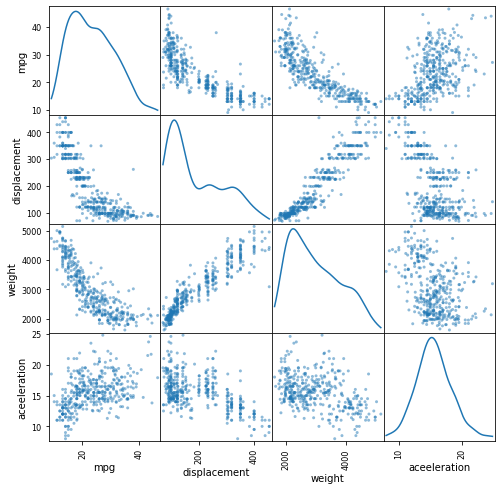

In [159]:
from pandas.plotting import scatter_matrix

scatter_matrix(dfn, 
               alpha=0.5, 
               figsize=(8, 8), 
               diagonal='kde')

plt.show()

# 5. 선형회귀

In [208]:
x = df[['displacement','weight', 'aceeleration']]

y = df[['mpg']]

In [190]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2,
                                                    random_state = 1234 )

In [194]:
x_train.values

array([[ 305. , 3425. ,   13.2],
       [  97. , 1834. ,   19. ],
       [ 232. , 2914. ,   16. ],
       [ 168. , 3820. ,   16.7],
       [ 232. , 3288. ,   15.5],
       [ 168. , 2910. ,   11.4],
       [  97. , 2065. ,   17.8],
       [ 225. , 3630. ,   17.7],
       [  91. , 1795. ,   17.5],
       [ 122. , 2310. ,   18.5],
       [ 111. , 2155. ,   14.8],
       [ 302. , 4141. ,   14. ],
       [  91. , 1985. ,   16. ],
       [ 135. , 2525. ,   16. ],
       [ 140. , 2870. ,   18.1],
       [ 350. , 4209. ,   12. ],
       [ 350. , 4502. ,   13.5],
       [  98. , 2125. ,   17.3],
       [ 114. , 2582. ,   14. ],
       [ 250. , 3781. ,   17. ],
       [  79. , 2000. ,   16. ],
       [ 105. , 2150. ,   14.9],
       [ 318. , 3940. ,   13.2],
       [ 151. , 2950. ,   17.3],
       [ 351. , 4657. ,   13.5],
       [  70. , 2124. ,   13.5],
       [ 140. , 2592. ,   18.5],
       [  86. , 2110. ,   17.9],
       [ 119. , 2300. ,   14.7],
       [ 119. , 2405. ,   14.9],
       [ 3

In [205]:
model = Sequential()
model.add( Dense( 1, input_dim = 3, activation = 'linear') )
sgd = optimizers.SGD( lr = 0.00001 )
model.compile( optimize = sgd, loss = 'mse', metrics = ['mse'])
history = model.fit(x_train.values, y_train.values, batch_size = 1, epochs = 200,
                    validation_split = 0.2, shuffle = False )

Train on 250 samples, validate on 63 samples
Epoch 1/200
250/250 [==============================] - 1s 2ms/sample - loss: 2745825.5052 - mse: 2745826.0000 - val_loss: 1446640.1136 - val_mse: 1446640.1250
Epoch 2/200
250/250 [==============================] - 0s 981us/sample - loss: 882887.9470 - mse: 882888.1250 - val_loss: 285098.2481 - val_mse: 285098.2500
Epoch 3/200
250/250 [==============================] - 0s 990us/sample - loss: 83710.8673 - mse: 83710.8672 - val_loss: 4757.5350 - val_mse: 4757.5347
Epoch 4/200
250/250 [==============================] - 0s 977us/sample - loss: 4398.2674 - mse: 4398.2681 - val_loss: 4313.9112 - val_mse: 4313.9106
Epoch 5/200
250/250 [==============================] - 0s 971us/sample - loss: 4046.4354 - mse: 4046.4351 - val_loss: 3961.6316 - val_mse: 3961.6318
Epoch 6/200
250/250 [==============================] - 0s 946us/sample - loss: 3711.0416 - mse: 3711.0393 - val_loss: 3623.7553 - val_mse: 3623.7551
Epoch 7/200
250/250 [====================

250/250 [==============================] - 0s 1ms/sample - loss: 45.6851 - mse: 45.6851 - val_loss: 45.0742 - val_mse: 45.0742
Epoch 58/200
250/250 [==============================] - 0s 964us/sample - loss: 45.6696 - mse: 45.6696 - val_loss: 45.0595 - val_mse: 45.0595
Epoch 59/200
250/250 [==============================] - 0s 959us/sample - loss: 45.6541 - mse: 45.6541 - val_loss: 45.0447 - val_mse: 45.0447
Epoch 60/200
250/250 [==============================] - 0s 1ms/sample - loss: 45.6385 - mse: 45.6385 - val_loss: 45.0298 - val_mse: 45.0298
Epoch 61/200
250/250 [==============================] - 0s 1ms/sample - loss: 45.6229 - mse: 45.6229 - val_loss: 45.0149 - val_mse: 45.0149
Epoch 62/200
250/250 [==============================] - 0s 976us/sample - loss: 45.6073 - mse: 45.6073 - val_loss: 44.9998 - val_mse: 44.9998
Epoch 63/200
250/250 [==============================] - 0s 962us/sample - loss: 45.5916 - mse: 45.5916 - val_loss: 44.9847 - val_mse: 44.9847
Epoch 64/200
250/250 [===

Epoch 115/200
250/250 [==============================] - 0s 979us/sample - loss: 44.7461 - mse: 44.7461 - val_loss: 44.1109 - val_mse: 44.1109
Epoch 116/200
250/250 [==============================] - 0s 971us/sample - loss: 44.7294 - mse: 44.7295 - val_loss: 44.0929 - val_mse: 44.0929
Epoch 117/200
250/250 [==============================] - 0s 974us/sample - loss: 44.7128 - mse: 44.7128 - val_loss: 44.0749 - val_mse: 44.0749
Epoch 118/200
250/250 [==============================] - ETA: 0s - loss: 48.3155 - mse: 48.315 - 0s 959us/sample - loss: 44.6961 - mse: 44.6961 - val_loss: 44.0569 - val_mse: 44.0569
Epoch 119/200
250/250 [==============================] - 0s 972us/sample - loss: 44.6794 - mse: 44.6794 - val_loss: 44.0388 - val_mse: 44.0388
Epoch 120/200
250/250 [==============================] - 0s 984us/sample - loss: 44.6627 - mse: 44.6627 - val_loss: 44.0207 - val_mse: 44.0207
Epoch 121/200
250/250 [==============================] - 0s 976us/sample - loss: 44.6460 - mse: 44.646

250/250 [==============================] - 0s 962us/sample - loss: 43.7902 - mse: 43.7902 - val_loss: 43.0574 - val_mse: 43.0574
Epoch 173/200
250/250 [==============================] - 0s 980us/sample - loss: 43.7734 - mse: 43.7734 - val_loss: 43.0387 - val_mse: 43.0386
Epoch 174/200
250/250 [==============================] - 0s 991us/sample - loss: 43.7566 - mse: 43.7567 - val_loss: 43.0199 - val_mse: 43.0199
Epoch 175/200
250/250 [==============================] - 0s 1ms/sample - loss: 43.7399 - mse: 43.7399 - val_loss: 43.0011 - val_mse: 43.0012
Epoch 176/200
250/250 [==============================] - 0s 959us/sample - loss: 43.7231 - mse: 43.7231 - val_loss: 42.9824 - val_mse: 42.9824
Epoch 177/200
250/250 [==============================] - 0s 1ms/sample - loss: 43.7064 - mse: 43.7064 - val_loss: 42.9636 - val_mse: 42.9636
Epoch 178/200
250/250 [==============================] - 0s 1ms/sample - loss: 43.6896 - mse: 43.6896 - val_loss: 42.9449 - val_mse: 42.9449
Epoch 179/200
250/2

In [206]:
evaluate = model.evaluate( x_test.values, y_test.values )

79/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [207]:
evaluate

[49.78842752191085, 49.788425]

In [197]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range(1, len( loss ) + 1 )

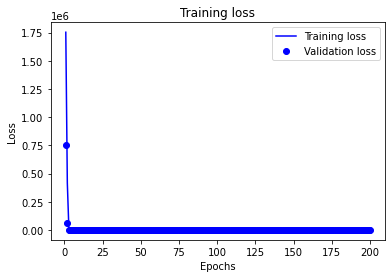

In [209]:
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.plot( epochs, val_loss, 'bo', label = 'Validation loss')
plt.title( 'Training loss' )
plt.xlabel( 'Epochs')
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [203]:
model = Sequential()
model.add( Dense( 1, input_dim = 3, activation = 'linear') )
sgd = optimizers.SGD( lr = 0.00001 )
model.compile( optimize = sgd, loss = 'mse', metrics = ['mse'])
history = model.fit(x_train.values, y_train.values, batch_size = 1, epochs = 2000,
                    validation_split = 0.2, shuffle = False )

Train on 250 samples, validate on 63 samples
Epoch 1/2000
250/250 [==============================] - 1s 2ms/sample - loss: 10916382.9140 - mse: 10916381.0000 - val_loss: 7347844.6151 - val_mse: 7347844.0000
Epoch 2/2000
250/250 [==============================] - 0s 960us/sample - loss: 6662708.7220 - mse: 6662708.5000 - val_loss: 4175627.3968 - val_mse: 4175627.5000
Epoch 3/2000
250/250 [==============================] - 0s 952us/sample - loss: 3470268.4718 - mse: 3470267.5000 - val_loss: 1901646.1786 - val_mse: 1901646.1250
Epoch 4/2000
250/250 [==============================] - 0s 1ms/sample - loss: 1329126.1372 - mse: 1329125.8750 - val_loss: 519923.3088 - val_mse: 519923.2500
Epoch 5/2000
250/250 [==============================] - 0s 976us/sample - loss: 226350.4126 - mse: 226350.4531 - val_loss: 9486.7181 - val_mse: 9486.7178
Epoch 6/2000
250/250 [==============================] - 0s 1ms/sample - loss: 899.5327 - mse: 899.5327 - val_loss: 175.3802 - val_mse: 175.3801
Epoch 7/2000


250/250 [==============================] - 0s 1ms/sample - loss: 91.1123 - mse: 91.1123 - val_loss: 94.1248 - val_mse: 94.1247
Epoch 57/2000
250/250 [==============================] - ETA: 0s - loss: 90.1526 - mse: 90.1526 - 0s 962us/sample - loss: 90.1174 - mse: 90.1174 - val_loss: 93.1867 - val_mse: 93.1867
Epoch 58/2000
250/250 [==============================] - 0s 961us/sample - loss: 89.1404 - mse: 89.1404 - val_loss: 92.2652 - val_mse: 92.2652
Epoch 59/2000
250/250 [==============================] - 0s 948us/sample - loss: 88.1811 - mse: 88.1811 - val_loss: 91.3600 - val_mse: 91.3600
Epoch 60/2000
250/250 [==============================] - 0s 948us/sample - loss: 87.2393 - mse: 87.2393 - val_loss: 90.4710 - val_mse: 90.4710
Epoch 61/2000
250/250 [==============================] - 0s 949us/sample - loss: 86.3149 - mse: 86.3149 - val_loss: 89.5979 - val_mse: 89.5980
Epoch 62/2000
250/250 [==============================] - 0s 1ms/sample - loss: 85.4077 - mse: 85.4077 - val_loss: 88.

Epoch 113/2000
250/250 [==============================] - 0s 1ms/sample - loss: 57.3505 - mse: 57.3504 - val_loss: 60.8877 - val_mse: 60.8877
Epoch 114/2000
250/250 [==============================] - 0s 959us/sample - loss: 57.0622 - mse: 57.0622 - val_loss: 60.5634 - val_mse: 60.5634
Epoch 115/2000
250/250 [==============================] - 0s 971us/sample - loss: 56.7806 - mse: 56.7806 - val_loss: 60.2449 - val_mse: 60.2449
Epoch 116/2000
250/250 [==============================] - 0s 981us/sample - loss: 56.5054 - mse: 56.5055 - val_loss: 59.9322 - val_mse: 59.9322
Epoch 117/2000
250/250 [==============================] - 0s 1ms/sample - loss: 56.2367 - mse: 56.2367 - val_loss: 59.6250 - val_mse: 59.6250
Epoch 118/2000
250/250 [==============================] - 0s 964us/sample - loss: 55.9741 - mse: 55.9741 - val_loss: 59.3233 - val_mse: 59.3233
Epoch 119/2000
250/250 [==============================] - 0s 965us/sample - loss: 55.7176 - mse: 55.7176 - val_loss: 59.0270 - val_mse: 59.0

250/250 [==============================] - 0s 967us/sample - loss: 48.1359 - mse: 48.1359 - val_loss: 49.4016 - val_mse: 49.4016
Epoch 170/2000
250/250 [==============================] - 0s 978us/sample - loss: 48.0525 - mse: 48.0526 - val_loss: 49.2851 - val_mse: 49.2851
Epoch 171/2000
250/250 [==============================] - 0s 975us/sample - loss: 47.9708 - mse: 47.9708 - val_loss: 49.1706 - val_mse: 49.1706
Epoch 172/2000
250/250 [==============================] - 0s 945us/sample - loss: 47.8908 - mse: 47.8907 - val_loss: 49.0581 - val_mse: 49.0581
Epoch 173/2000
250/250 [==============================] - 0s 965us/sample - loss: 47.8122 - mse: 47.8122 - val_loss: 48.9477 - val_mse: 48.9477
Epoch 174/2000
250/250 [==============================] - 0s 953us/sample - loss: 47.7352 - mse: 47.7352 - val_loss: 48.8392 - val_mse: 48.8392
Epoch 175/2000
250/250 [==============================] - 0s 981us/sample - loss: 47.6596 - mse: 47.6596 - val_loss: 48.7325 - val_mse: 48.7325
Epoch 1

250/250 [==============================] - 0s 947us/sample - loss: 45.1031 - mse: 45.1031 - val_loss: 45.0770 - val_mse: 45.0770
Epoch 227/2000
250/250 [==============================] - 0s 984us/sample - loss: 45.0693 - mse: 45.0693 - val_loss: 45.0292 - val_mse: 45.0292
Epoch 228/2000
250/250 [==============================] - 0s 958us/sample - loss: 45.0358 - mse: 45.0358 - val_loss: 44.9819 - val_mse: 44.9819
Epoch 229/2000
250/250 [==============================] - 0s 980us/sample - loss: 45.0027 - mse: 45.0026 - val_loss: 44.9352 - val_mse: 44.9352
Epoch 230/2000
250/250 [==============================] - 0s 965us/sample - loss: 44.9699 - mse: 44.9699 - val_loss: 44.8891 - val_mse: 44.8891
Epoch 231/2000
250/250 [==============================] - 0s 973us/sample - loss: 44.9376 - mse: 44.9376 - val_loss: 44.8436 - val_mse: 44.8436
Epoch 232/2000
250/250 [==============================] - 0s 951us/sample - loss: 44.9055 - mse: 44.9055 - val_loss: 44.7986 - val_mse: 44.7986
Epoch 2

250/250 [==============================] - 0s 961us/sample - loss: 43.6106 - mse: 43.6105 - val_loss: 43.0471 - val_mse: 43.0471
Epoch 283/2000
250/250 [==============================] - 0s 985us/sample - loss: 43.5888 - mse: 43.5888 - val_loss: 43.0190 - val_mse: 43.0190
Epoch 284/2000
250/250 [==============================] - 0s 962us/sample - loss: 43.5672 - mse: 43.5672 - val_loss: 42.9911 - val_mse: 42.9911
Epoch 285/2000
250/250 [==============================] - 0s 968us/sample - loss: 43.5457 - mse: 43.5457 - val_loss: 42.9635 - val_mse: 42.9635
Epoch 286/2000
250/250 [==============================] - 0s 966us/sample - loss: 43.5243 - mse: 43.5243 - val_loss: 42.9360 - val_mse: 42.9360
Epoch 287/2000
250/250 [==============================] - 0s 974us/sample - loss: 43.5030 - mse: 43.5030 - val_loss: 42.9086 - val_mse: 42.9086
Epoch 288/2000
250/250 [==============================] - 0s 958us/sample - loss: 43.4818 - mse: 43.4818 - val_loss: 42.8815 - val_mse: 42.8815
Epoch 2

Epoch 339/2000
250/250 [==============================] - 0s 966us/sample - loss: 42.5000 - mse: 42.5000 - val_loss: 41.6669 - val_mse: 41.6669
Epoch 340/2000
250/250 [==============================] - 0s 966us/sample - loss: 42.4822 - mse: 42.4822 - val_loss: 41.6455 - val_mse: 41.6455
Epoch 341/2000
250/250 [==============================] - 0s 961us/sample - loss: 42.4644 - mse: 42.4644 - val_loss: 41.6242 - val_mse: 41.6242
Epoch 342/2000
250/250 [==============================] - 0s 916us/sample - loss: 42.4466 - mse: 42.4466 - val_loss: 41.6029 - val_mse: 41.6030
Epoch 343/2000
250/250 [==============================] - 0s 953us/sample - loss: 42.4289 - mse: 42.4290 - val_loss: 41.5818 - val_mse: 41.5818
Epoch 344/2000
250/250 [==============================] - 0s 987us/sample - loss: 42.4113 - mse: 42.4113 - val_loss: 41.5607 - val_mse: 41.5607
Epoch 345/2000
250/250 [==============================] - 0s 958us/sample - loss: 42.3936 - mse: 42.3936 - val_loss: 41.5396 - val_mse: 

Epoch 396/2000
250/250 [==============================] - 0s 985us/sample - loss: 41.5354 - mse: 41.5354 - val_loss: 40.5336 - val_mse: 40.5336
Epoch 397/2000
250/250 [==============================] - 0s 989us/sample - loss: 41.5193 - mse: 41.5193 - val_loss: 40.5149 - val_mse: 40.5149
Epoch 398/2000
250/250 [==============================] - 0s 978us/sample - loss: 41.5031 - mse: 41.5031 - val_loss: 40.4962 - val_mse: 40.4962
Epoch 399/2000
250/250 [==============================] - 0s 976us/sample - loss: 41.4870 - mse: 41.4869 - val_loss: 40.4776 - val_mse: 40.4776
Epoch 400/2000
250/250 [==============================] - 0s 976us/sample - loss: 41.4708 - mse: 41.4708 - val_loss: 40.4590 - val_mse: 40.4590
Epoch 401/2000
250/250 [==============================] - 0s 974us/sample - loss: 41.4547 - mse: 41.4548 - val_loss: 40.4404 - val_mse: 40.4404
Epoch 402/2000
250/250 [==============================] - 0s 988us/sample - loss: 41.4387 - mse: 41.4387 - val_loss: 40.4219 - val_mse: 

Epoch 453/2000
250/250 [==============================] - 0s 938us/sample - loss: 40.6416 - mse: 40.6416 - val_loss: 39.5106 - val_mse: 39.5106
Epoch 454/2000
250/250 [==============================] - 0s 964us/sample - loss: 40.6263 - mse: 40.6263 - val_loss: 39.4933 - val_mse: 39.4933
Epoch 455/2000
250/250 [==============================] - 0s 978us/sample - loss: 40.6111 - mse: 40.6111 - val_loss: 39.4760 - val_mse: 39.4760
Epoch 456/2000
250/250 [==============================] - 0s 977us/sample - loss: 40.5959 - mse: 40.5959 - val_loss: 39.4587 - val_mse: 39.4587
Epoch 457/2000
250/250 [==============================] - 0s 975us/sample - loss: 40.5807 - mse: 40.5807 - val_loss: 39.4415 - val_mse: 39.4415
Epoch 458/2000
250/250 [==============================] - 0s 986us/sample - loss: 40.5656 - mse: 40.5655 - val_loss: 39.4243 - val_mse: 39.4243
Epoch 459/2000
250/250 [==============================] - 0s 969us/sample - loss: 40.5504 - mse: 40.5504 - val_loss: 39.4071 - val_mse: 

Epoch 510/2000
250/250 [==============================] - 0s 993us/sample - loss: 39.7940 - mse: 39.7940 - val_loss: 38.5528 - val_mse: 38.5528
Epoch 511/2000
250/250 [==============================] - 0s 977us/sample - loss: 39.7795 - mse: 39.7795 - val_loss: 38.5364 - val_mse: 38.5364
Epoch 512/2000
250/250 [==============================] - 0s 974us/sample - loss: 39.7650 - mse: 39.7650 - val_loss: 38.5201 - val_mse: 38.5201
Epoch 513/2000
250/250 [==============================] - 0s 985us/sample - loss: 39.7505 - mse: 39.7505 - val_loss: 38.5038 - val_mse: 38.5038
Epoch 514/2000
250/250 [==============================] - 0s 1ms/sample - loss: 39.7360 - mse: 39.7360 - val_loss: 38.4875 - val_mse: 38.4875
Epoch 515/2000
250/250 [==============================] - 0s 992us/sample - loss: 39.7216 - mse: 39.7215 - val_loss: 38.4712 - val_mse: 38.4712
Epoch 516/2000
250/250 [==============================] - 0s 1ms/sample - loss: 39.7071 - mse: 39.7071 - val_loss: 38.4550 - val_mse: 38.4

250/250 [==============================] - 0s 973us/sample - loss: 38.9842 - mse: 38.9842 - val_loss: 37.6447 - val_mse: 37.6447
Epoch 568/2000
250/250 [==============================] - 0s 963us/sample - loss: 38.9703 - mse: 38.9703 - val_loss: 37.6292 - val_mse: 37.6292
Epoch 569/2000
250/250 [==============================] - 0s 959us/sample - loss: 38.9565 - mse: 38.9565 - val_loss: 37.6137 - val_mse: 37.6137
Epoch 570/2000
250/250 [==============================] - 0s 971us/sample - loss: 38.9426 - mse: 38.9426 - val_loss: 37.5982 - val_mse: 37.5982
Epoch 571/2000
250/250 [==============================] - 0s 967us/sample - loss: 38.9287 - mse: 38.9287 - val_loss: 37.5827 - val_mse: 37.5827
Epoch 572/2000
250/250 [==============================] - 0s 1ms/sample - loss: 38.9149 - mse: 38.9149 - val_loss: 37.5672 - val_mse: 37.5672
Epoch 573/2000
250/250 [==============================] - 0s 970us/sample - loss: 38.9010 - mse: 38.9010 - val_loss: 37.5517 - val_mse: 37.5517
Epoch 574

250/250 [==============================] - 0s 963us/sample - loss: 38.2220 - mse: 38.2221 - val_loss: 36.7954 - val_mse: 36.7954
Epoch 624/2000
250/250 [==============================] - 0s 960us/sample - loss: 38.2087 - mse: 38.2087 - val_loss: 36.7806 - val_mse: 36.7806
Epoch 625/2000
250/250 [==============================] - 0s 974us/sample - loss: 38.1954 - mse: 38.1954 - val_loss: 36.7658 - val_mse: 36.7658
Epoch 626/2000
250/250 [==============================] - 0s 974us/sample - loss: 38.1821 - mse: 38.1821 - val_loss: 36.7511 - val_mse: 36.7511
Epoch 627/2000
250/250 [==============================] - 0s 958us/sample - loss: 38.1688 - mse: 38.1689 - val_loss: 36.7363 - val_mse: 36.7363
Epoch 628/2000
250/250 [==============================] - 0s 958us/sample - loss: 38.1556 - mse: 38.1556 - val_loss: 36.7216 - val_mse: 36.7216
Epoch 629/2000
250/250 [==============================] - 0s 972us/sample - loss: 38.1423 - mse: 38.1423 - val_loss: 36.7069 - val_mse: 36.7069
Epoch 6

Epoch 680/2000
250/250 [==============================] - 0s 952us/sample - loss: 37.4788 - mse: 37.4788 - val_loss: 35.9725 - val_mse: 35.9725
Epoch 681/2000
250/250 [==============================] - 0s 966us/sample - loss: 37.4660 - mse: 37.4660 - val_loss: 35.9584 - val_mse: 35.9584
Epoch 682/2000
250/250 [==============================] - 0s 975us/sample - loss: 37.4533 - mse: 37.4533 - val_loss: 35.9443 - val_mse: 35.9443
Epoch 683/2000
250/250 [==============================] - 0s 968us/sample - loss: 37.4406 - mse: 37.4406 - val_loss: 35.9303 - val_mse: 35.9303
Epoch 684/2000
250/250 [==============================] - 0s 962us/sample - loss: 37.4278 - mse: 37.4278 - val_loss: 35.9162 - val_mse: 35.9162
Epoch 685/2000
250/250 [==============================] - 0s 969us/sample - loss: 37.4151 - mse: 37.4151 - val_loss: 35.9022 - val_mse: 35.9022
Epoch 686/2000
250/250 [==============================] - 0s 965us/sample - loss: 37.4024 - mse: 37.4024 - val_loss: 35.8882 - val_mse: 

Epoch 737/2000
250/250 [==============================] - 0s 962us/sample - loss: 36.7673 - mse: 36.7673 - val_loss: 35.1899 - val_mse: 35.1899
Epoch 738/2000
250/250 [==============================] - 0s 986us/sample - loss: 36.7551 - mse: 36.7551 - val_loss: 35.1766 - val_mse: 35.1766
Epoch 739/2000
250/250 [==============================] - 0s 977us/sample - loss: 36.7429 - mse: 36.7429 - val_loss: 35.1632 - val_mse: 35.1632
Epoch 740/2000
250/250 [==============================] - 0s 948us/sample - loss: 36.7307 - mse: 36.7307 - val_loss: 35.1499 - val_mse: 35.1499
Epoch 741/2000
250/250 [==============================] - 0s 988us/sample - loss: 36.7185 - mse: 36.7185 - val_loss: 35.1365 - val_mse: 35.1365
Epoch 742/2000
250/250 [==============================] - 0s 939us/sample - loss: 36.7064 - mse: 36.7064 - val_loss: 35.1232 - val_mse: 35.1232
Epoch 743/2000
250/250 [==============================] - 0s 955us/sample - loss: 36.6942 - mse: 36.6942 - val_loss: 35.1099 - val_mse: 

Epoch 794/2000
250/250 [==============================] - 0s 936us/sample - loss: 36.0867 - mse: 36.0867 - val_loss: 34.4469 - val_mse: 34.4469
Epoch 795/2000
250/250 [==============================] - 0s 954us/sample - loss: 36.0750 - mse: 36.0750 - val_loss: 34.4342 - val_mse: 34.4342
Epoch 796/2000
250/250 [==============================] - 0s 969us/sample - loss: 36.0634 - mse: 36.0633 - val_loss: 34.4216 - val_mse: 34.4216
Epoch 797/2000
250/250 [==============================] - 0s 974us/sample - loss: 36.0517 - mse: 36.0517 - val_loss: 34.4089 - val_mse: 34.4089
Epoch 798/2000
250/250 [==============================] - 0s 983us/sample - loss: 36.0401 - mse: 36.0401 - val_loss: 34.3962 - val_mse: 34.3962
Epoch 799/2000
250/250 [==============================] - 0s 982us/sample - loss: 36.0284 - mse: 36.0284 - val_loss: 34.3836 - val_mse: 34.3836
Epoch 800/2000
250/250 [==============================] - 0s 960us/sample - loss: 36.0168 - mse: 36.0168 - val_loss: 34.3710 - val_mse: 

Epoch 851/2000
250/250 [==============================] - ETA: 0s - loss: 38.3726 - mse: 38.372 - 0s 954us/sample - loss: 35.4362 - mse: 35.4362 - val_loss: 33.7423 - val_mse: 33.7423
Epoch 852/2000
250/250 [==============================] - 0s 960us/sample - loss: 35.4250 - mse: 35.4250 - val_loss: 33.7303 - val_mse: 33.7303
Epoch 853/2000
250/250 [==============================] - 0s 961us/sample - loss: 35.4139 - mse: 35.4139 - val_loss: 33.7183 - val_mse: 33.7183
Epoch 854/2000
250/250 [==============================] - 0s 982us/sample - loss: 35.4027 - mse: 35.4027 - val_loss: 33.7063 - val_mse: 33.7063
Epoch 855/2000
250/250 [==============================] - 0s 999us/sample - loss: 35.3916 - mse: 35.3916 - val_loss: 33.6943 - val_mse: 33.6943
Epoch 856/2000
250/250 [==============================] - 0s 978us/sample - loss: 35.3805 - mse: 35.3805 - val_loss: 33.6823 - val_mse: 33.6823
Epoch 857/2000
250/250 [==============================] - 0s 974us/sample - loss: 35.3694 - mse:

250/250 [==============================] - 0s 970us/sample - loss: 34.8257 - mse: 34.8257 - val_loss: 33.0867 - val_mse: 33.0867
Epoch 908/2000
250/250 [==============================] - 0s 970us/sample - loss: 34.8150 - mse: 34.8150 - val_loss: 33.0753 - val_mse: 33.0753
Epoch 909/2000
250/250 [==============================] - 0s 958us/sample - loss: 34.8044 - mse: 34.8044 - val_loss: 33.0640 - val_mse: 33.0640
Epoch 910/2000
250/250 [==============================] - 0s 968us/sample - loss: 34.7937 - mse: 34.7938 - val_loss: 33.0526 - val_mse: 33.0526
Epoch 911/2000
250/250 [==============================] - 0s 969us/sample - loss: 34.7831 - mse: 34.7831 - val_loss: 33.0413 - val_mse: 33.0413
Epoch 912/2000
250/250 [==============================] - 0s 963us/sample - loss: 34.7725 - mse: 34.7725 - val_loss: 33.0299 - val_mse: 33.0299
Epoch 913/2000
250/250 [==============================] - 0s 1ms/sample - loss: 34.7619 - mse: 34.7619 - val_loss: 33.0186 - val_mse: 33.0186
Epoch 914

250/250 [==============================] - 0s 960us/sample - loss: 34.2326 - mse: 34.2326 - val_loss: 32.4557 - val_mse: 32.4557
Epoch 965/2000
250/250 [==============================] - 0s 960us/sample - loss: 34.2224 - mse: 34.2224 - val_loss: 32.4449 - val_mse: 32.4449
Epoch 966/2000
250/250 [==============================] - 0s 947us/sample - loss: 34.2123 - mse: 34.2123 - val_loss: 32.4342 - val_mse: 32.4342
Epoch 967/2000
250/250 [==============================] - 0s 972us/sample - loss: 34.2021 - mse: 34.2021 - val_loss: 32.4234 - val_mse: 32.4234
Epoch 968/2000
250/250 [==============================] - 0s 968us/sample - loss: 34.1920 - mse: 34.1920 - val_loss: 32.4127 - val_mse: 32.4127
Epoch 969/2000
250/250 [==============================] - 0s 951us/sample - loss: 34.1819 - mse: 34.1819 - val_loss: 32.4020 - val_mse: 32.4020
Epoch 970/2000
250/250 [==============================] - 0s 955us/sample - loss: 34.1718 - mse: 34.1718 - val_loss: 32.3913 - val_mse: 32.3913
Epoch 9

250/250 [==============================] - 0s 966us/sample - loss: 33.6673 - mse: 33.6673 - val_loss: 31.8602 - val_mse: 31.8602
Epoch 1022/2000
250/250 [==============================] - 0s 991us/sample - loss: 33.6577 - mse: 33.6577 - val_loss: 31.8501 - val_mse: 31.8501
Epoch 1023/2000
250/250 [==============================] - 0s 974us/sample - loss: 33.6480 - mse: 33.6480 - val_loss: 31.8400 - val_mse: 31.8400
Epoch 1024/2000
250/250 [==============================] - 0s 959us/sample - loss: 33.6383 - mse: 33.6383 - val_loss: 31.8299 - val_mse: 31.8299
Epoch 1025/2000
250/250 [==============================] - 0s 1ms/sample - loss: 33.6287 - mse: 33.6287 - val_loss: 31.8198 - val_mse: 31.8198
Epoch 1026/2000
250/250 [==============================] - 0s 985us/sample - loss: 33.6191 - mse: 33.6191 - val_loss: 31.8097 - val_mse: 31.8097
Epoch 1027/2000
250/250 [==============================] - 0s 1ms/sample - loss: 33.6094 - mse: 33.6094 - val_loss: 31.7996 - val_mse: 31.7996
Epoch

Epoch 1078/2000
250/250 [==============================] - 0s 962us/sample - loss: 33.1291 - mse: 33.1291 - val_loss: 31.2993 - val_mse: 31.2993
Epoch 1079/2000
250/250 [==============================] - 0s 995us/sample - loss: 33.1199 - mse: 33.1199 - val_loss: 31.2898 - val_mse: 31.2898
Epoch 1080/2000
250/250 [==============================] - 0s 992us/sample - loss: 33.1107 - mse: 33.1107 - val_loss: 31.2802 - val_mse: 31.2802
Epoch 1081/2000
250/250 [==============================] - 0s 993us/sample - loss: 33.1015 - mse: 33.1015 - val_loss: 31.2707 - val_mse: 31.2707
Epoch 1082/2000
250/250 [==============================] - 0s 982us/sample - loss: 33.0924 - mse: 33.0924 - val_loss: 31.2612 - val_mse: 31.2612
Epoch 1083/2000
250/250 [==============================] - 0s 992us/sample - loss: 33.0832 - mse: 33.0832 - val_loss: 31.2517 - val_mse: 31.2517
Epoch 1084/2000
250/250 [==============================] - 0s 955us/sample - loss: 33.0740 - mse: 33.0740 - val_loss: 31.2422 - va

250/250 [==============================] - 0s 996us/sample - loss: 32.6260 - mse: 32.6260 - val_loss: 30.7808 - val_mse: 30.7808
Epoch 1135/2000
250/250 [==============================] - 0s 960us/sample - loss: 32.6172 - mse: 32.6172 - val_loss: 30.7718 - val_mse: 30.7718
Epoch 1136/2000
250/250 [==============================] - 0s 982us/sample - loss: 32.6084 - mse: 32.6084 - val_loss: 30.7628 - val_mse: 30.7628
Epoch 1137/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.5997 - mse: 32.5997 - val_loss: 30.7539 - val_mse: 30.7539
Epoch 1138/2000
250/250 [==============================] - 0s 967us/sample - loss: 32.5910 - mse: 32.5910 - val_loss: 30.7450 - val_mse: 30.7450
Epoch 1139/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.5822 - mse: 32.5822 - val_loss: 30.7360 - val_mse: 30.7360
Epoch 1140/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.5735 - mse: 32.5735 - val_loss: 30.7271 - val_mse: 30.7271
Epoch 1

250/250 [==============================] - 0s 1ms/sample - loss: 32.1473 - mse: 32.1473 - val_loss: 30.2934 - val_mse: 30.2934
Epoch 1191/2000
250/250 [==============================] - 0s 967us/sample - loss: 32.1390 - mse: 32.1390 - val_loss: 30.2850 - val_mse: 30.2850
Epoch 1192/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.1307 - mse: 32.1307 - val_loss: 30.2766 - val_mse: 30.2766
Epoch 1193/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.1224 - mse: 32.1224 - val_loss: 30.2682 - val_mse: 30.2682
Epoch 1194/2000
250/250 [==============================] - 0s 1ms/sample - loss: 32.1141 - mse: 32.1141 - val_loss: 30.2598 - val_mse: 30.2598
Epoch 1195/2000
250/250 [==============================] - 0s 964us/sample - loss: 32.1058 - mse: 32.1058 - val_loss: 30.2514 - val_mse: 30.2514
Epoch 1196/2000
250/250 [==============================] - 0s 975us/sample - loss: 32.0975 - mse: 32.0975 - val_loss: 30.2430 - val_mse: 30.2430
Epoch 119

Epoch 1247/2000
250/250 [==============================] - 0s 973us/sample - loss: 31.6846 - mse: 31.6846 - val_loss: 29.8282 - val_mse: 29.8282
Epoch 1248/2000
250/250 [==============================] - 0s 960us/sample - loss: 31.6767 - mse: 31.6767 - val_loss: 29.8203 - val_mse: 29.8203
Epoch 1249/2000
250/250 [==============================] - ETA: 0s - loss: 34.0437 - mse: 34.043 - 0s 959us/sample - loss: 31.6688 - mse: 31.6688 - val_loss: 29.8125 - val_mse: 29.8124
Epoch 1250/2000
250/250 [==============================] - 0s 1ms/sample - loss: 31.6609 - mse: 31.6609 - val_loss: 29.8046 - val_mse: 29.8046
Epoch 1251/2000
250/250 [==============================] - 0s 955us/sample - loss: 31.6530 - mse: 31.6531 - val_loss: 29.7967 - val_mse: 29.7967
Epoch 1252/2000
250/250 [==============================] - 0s 961us/sample - loss: 31.6452 - mse: 31.6452 - val_loss: 29.7889 - val_mse: 29.7889
Epoch 1253/2000
250/250 [==============================] - 0s 979us/sample - loss: 31.6373 -

Epoch 1303/2000
250/250 [==============================] - 0s 967us/sample - loss: 31.2532 - mse: 31.2532 - val_loss: 29.4004 - val_mse: 29.4004
Epoch 1304/2000
250/250 [==============================] - 0s 970us/sample - loss: 31.2457 - mse: 31.2457 - val_loss: 29.3930 - val_mse: 29.3930
Epoch 1305/2000
250/250 [==============================] - ETA: 0s - loss: 33.9658 - mse: 33.965 - 0s 987us/sample - loss: 31.2383 - mse: 31.2383 - val_loss: 29.3856 - val_mse: 29.3856
Epoch 1306/2000
250/250 [==============================] - 0s 981us/sample - loss: 31.2308 - mse: 31.2308 - val_loss: 29.3783 - val_mse: 29.3783
Epoch 1307/2000
250/250 [==============================] - 0s 978us/sample - loss: 31.2233 - mse: 31.2233 - val_loss: 29.3709 - val_mse: 29.3709
Epoch 1308/2000
250/250 [==============================] - 0s 964us/sample - loss: 31.2158 - mse: 31.2158 - val_loss: 29.3635 - val_mse: 29.3635
Epoch 1309/2000
250/250 [==============================] - 0s 971us/sample - loss: 31.2083

250/250 [==============================] - 0s 980us/sample - loss: 30.8441 - mse: 30.8441 - val_loss: 29.0003 - val_mse: 29.0003
Epoch 1360/2000
250/250 [==============================] - 0s 952us/sample - loss: 30.8370 - mse: 30.8370 - val_loss: 28.9934 - val_mse: 28.9934
Epoch 1361/2000
250/250 [==============================] - 0s 963us/sample - loss: 30.8299 - mse: 30.8299 - val_loss: 28.9866 - val_mse: 28.9865
Epoch 1362/2000
250/250 [==============================] - 0s 956us/sample - loss: 30.8229 - mse: 30.8229 - val_loss: 28.9797 - val_mse: 28.9797
Epoch 1363/2000
250/250 [==============================] - 0s 972us/sample - loss: 30.8158 - mse: 30.8158 - val_loss: 28.9728 - val_mse: 28.9728
Epoch 1364/2000
250/250 [==============================] - 0s 976us/sample - loss: 30.8087 - mse: 30.8087 - val_loss: 28.9659 - val_mse: 28.9660
Epoch 1365/2000
250/250 [==============================] - 0s 976us/sample - loss: 30.8016 - mse: 30.8016 - val_loss: 28.9591 - val_mse: 28.9591
E

Epoch 1416/2000
250/250 [==============================] - 0s 972us/sample - loss: 30.4497 - mse: 30.4497 - val_loss: 28.6204 - val_mse: 28.6204
Epoch 1417/2000
250/250 [==============================] - 0s 981us/sample - loss: 30.4430 - mse: 30.4430 - val_loss: 28.6140 - val_mse: 28.6140
Epoch 1418/2000
250/250 [==============================] - 0s 960us/sample - loss: 30.4363 - mse: 30.4363 - val_loss: 28.6076 - val_mse: 28.6076
Epoch 1419/2000
250/250 [==============================] - 0s 1ms/sample - loss: 30.4296 - mse: 30.4296 - val_loss: 28.6012 - val_mse: 28.6012
Epoch 1420/2000
250/250 [==============================] - 0s 973us/sample - loss: 30.4229 - mse: 30.4229 - val_loss: 28.5948 - val_mse: 28.5948
Epoch 1421/2000
250/250 [==============================] - 0s 959us/sample - loss: 30.4162 - mse: 30.4162 - val_loss: 28.5884 - val_mse: 28.5884
Epoch 1422/2000
250/250 [==============================] - 0s 1ms/sample - loss: 30.4095 - mse: 30.4094 - val_loss: 28.5820 - val_ms

250/250 [==============================] - 0s 1ms/sample - loss: 30.0831 - mse: 30.0831 - val_loss: 28.2729 - val_mse: 28.2729
Epoch 1473/2000
250/250 [==============================] - 0s 974us/sample - loss: 30.0768 - mse: 30.0768 - val_loss: 28.2669 - val_mse: 28.2669
Epoch 1474/2000
250/250 [==============================] - 0s 1ms/sample - loss: 30.0704 - mse: 30.0704 - val_loss: 28.2610 - val_mse: 28.2610
Epoch 1475/2000
250/250 [==============================] - 0s 982us/sample - loss: 30.0641 - mse: 30.0641 - val_loss: 28.2550 - val_mse: 28.2550
Epoch 1476/2000
250/250 [==============================] - 0s 981us/sample - loss: 30.0578 - mse: 30.0578 - val_loss: 28.2491 - val_mse: 28.2491
Epoch 1477/2000
250/250 [==============================] - 0s 1ms/sample - loss: 30.0514 - mse: 30.0514 - val_loss: 28.2431 - val_mse: 28.2431
Epoch 1478/2000
250/250 [==============================] - 0s 1ms/sample - loss: 30.0451 - mse: 30.0451 - val_loss: 28.2372 - val_mse: 28.2372
Epoch 147

Epoch 1529/2000
250/250 [==============================] - 0s 985us/sample - loss: 29.7306 - mse: 29.7306 - val_loss: 27.9443 - val_mse: 27.9443
Epoch 1530/2000
250/250 [==============================] - 0s 968us/sample - loss: 29.7246 - mse: 29.7246 - val_loss: 27.9387 - val_mse: 27.9387
Epoch 1531/2000
250/250 [==============================] - 0s 974us/sample - loss: 29.7186 - mse: 29.7186 - val_loss: 27.9332 - val_mse: 27.9332
Epoch 1532/2000
250/250 [==============================] - 0s 964us/sample - loss: 29.7126 - mse: 29.7126 - val_loss: 27.9277 - val_mse: 27.9277
Epoch 1533/2000
250/250 [==============================] - 0s 973us/sample - loss: 29.7066 - mse: 29.7066 - val_loss: 27.9221 - val_mse: 27.9221
Epoch 1534/2000
250/250 [==============================] - 0s 987us/sample - loss: 29.7006 - mse: 29.7006 - val_loss: 27.9166 - val_mse: 27.9166
Epoch 1535/2000
250/250 [==============================] - 0s 1ms/sample - loss: 29.6947 - mse: 29.6946 - val_loss: 27.9111 - val_

250/250 [==============================] - 0s 970us/sample - loss: 29.4035 - mse: 29.4035 - val_loss: 27.6447 - val_mse: 27.6447
Epoch 1586/2000
250/250 [==============================] - 0s 961us/sample - loss: 29.3978 - mse: 29.3978 - val_loss: 27.6395 - val_mse: 27.6395
Epoch 1587/2000
250/250 [==============================] - ETA: 0s - loss: 31.6747 - mse: 31.674 - 0s 966us/sample - loss: 29.3921 - mse: 29.3921 - val_loss: 27.6344 - val_mse: 27.6344
Epoch 1588/2000
250/250 [==============================] - 0s 947us/sample - loss: 29.3865 - mse: 29.3865 - val_loss: 27.6293 - val_mse: 27.6293
Epoch 1589/2000
250/250 [==============================] - 0s 962us/sample - loss: 29.3808 - mse: 29.3808 - val_loss: 27.6242 - val_mse: 27.6242
Epoch 1590/2000
250/250 [==============================] - 0s 961us/sample - loss: 29.3752 - mse: 29.3752 - val_loss: 27.6190 - val_mse: 27.6190
Epoch 1591/2000
250/250 [==============================] - 0s 1ms/sample - loss: 29.3695 - mse: 29.3695 - 

250/250 [==============================] - 0s 1ms/sample - loss: 29.0947 - mse: 29.0948 - val_loss: 27.3672 - val_mse: 27.3672
Epoch 1642/2000
250/250 [==============================] - 0s 986us/sample - loss: 29.0894 - mse: 29.0894 - val_loss: 27.3624 - val_mse: 27.3624
Epoch 1643/2000
250/250 [==============================] - 0s 959us/sample - loss: 29.0841 - mse: 29.0841 - val_loss: 27.3577 - val_mse: 27.3577
Epoch 1644/2000
250/250 [==============================] - 0s 958us/sample - loss: 29.0787 - mse: 29.0787 - val_loss: 27.3529 - val_mse: 27.3529
Epoch 1645/2000
250/250 [==============================] - 0s 977us/sample - loss: 29.0734 - mse: 29.0734 - val_loss: 27.3482 - val_mse: 27.3482
Epoch 1646/2000
250/250 [==============================] - 0s 987us/sample - loss: 29.0681 - mse: 29.0681 - val_loss: 27.3434 - val_mse: 27.3434
Epoch 1647/2000
250/250 [==============================] - 0s 998us/sample - loss: 29.0627 - mse: 29.0627 - val_loss: 27.3387 - val_mse: 27.3387
Epo

Epoch 1698/2000
250/250 [==============================] - 0s 969us/sample - loss: 28.7987 - mse: 28.7987 - val_loss: 27.1062 - val_mse: 27.1062
Epoch 1699/2000
250/250 [==============================] - 0s 973us/sample - loss: 28.7937 - mse: 28.7937 - val_loss: 27.1018 - val_mse: 27.1018
Epoch 1700/2000
250/250 [==============================] - 0s 972us/sample - loss: 28.7887 - mse: 28.7887 - val_loss: 27.0975 - val_mse: 27.0975
Epoch 1701/2000
250/250 [==============================] - 0s 968us/sample - loss: 28.7836 - mse: 28.7836 - val_loss: 27.0931 - val_mse: 27.0931
Epoch 1702/2000
250/250 [==============================] - 0s 974us/sample - loss: 28.7786 - mse: 28.7786 - val_loss: 27.0887 - val_mse: 27.0887
Epoch 1703/2000
250/250 [==============================] - 0s 962us/sample - loss: 28.7736 - mse: 28.7736 - val_loss: 27.0844 - val_mse: 27.0843
Epoch 1704/2000
250/250 [==============================] - 0s 959us/sample - loss: 28.7686 - mse: 28.7686 - val_loss: 27.0800 - va

250/250 [==============================] - 0s 1ms/sample - loss: 28.5249 - mse: 28.5249 - val_loss: 26.8699 - val_mse: 26.8699
Epoch 1755/2000
250/250 [==============================] - 0s 961us/sample - loss: 28.5202 - mse: 28.5202 - val_loss: 26.8658 - val_mse: 26.8658
Epoch 1756/2000
250/250 [==============================] - 0s 971us/sample - loss: 28.5154 - mse: 28.5154 - val_loss: 26.8618 - val_mse: 26.8618
Epoch 1757/2000
250/250 [==============================] - 0s 967us/sample - loss: 28.5107 - mse: 28.5107 - val_loss: 26.8577 - val_mse: 26.8578
Epoch 1758/2000
250/250 [==============================] - 0s 963us/sample - loss: 28.5060 - mse: 28.5060 - val_loss: 26.8537 - val_mse: 26.8537
Epoch 1759/2000
250/250 [==============================] - 0s 959us/sample - loss: 28.5013 - mse: 28.5013 - val_loss: 26.8497 - val_mse: 26.8497
Epoch 1760/2000
250/250 [==============================] - 0s 974us/sample - loss: 28.4966 - mse: 28.4966 - val_loss: 26.8457 - val_mse: 26.8457
Epo

250/250 [==============================] - 0s 1ms/sample - loss: 28.2674 - mse: 28.2674 - val_loss: 26.6524 - val_mse: 26.6524
Epoch 1811/2000
250/250 [==============================] - 0s 963us/sample - loss: 28.2630 - mse: 28.2630 - val_loss: 26.6486 - val_mse: 26.6486
Epoch 1812/2000
250/250 [==============================] - 0s 977us/sample - loss: 28.2585 - mse: 28.2585 - val_loss: 26.6449 - val_mse: 26.6449
Epoch 1813/2000
250/250 [==============================] - 0s 966us/sample - loss: 28.2541 - mse: 28.2541 - val_loss: 26.6412 - val_mse: 26.6412
Epoch 1814/2000
250/250 [==============================] - 0s 1ms/sample - loss: 28.2496 - mse: 28.2496 - val_loss: 26.6375 - val_mse: 26.6375
Epoch 1815/2000
250/250 [==============================] - 0s 1ms/sample - loss: 28.2452 - mse: 28.2452 - val_loss: 26.6338 - val_mse: 26.6338
Epoch 1816/2000
250/250 [==============================] - 0s 971us/sample - loss: 28.2408 - mse: 28.2408 - val_loss: 26.6301 - val_mse: 26.6301
Epoch 1

250/250 [==============================] - 0s 966us/sample - loss: 28.0254 - mse: 28.0254 - val_loss: 26.4525 - val_mse: 26.4525
Epoch 1867/2000
250/250 [==============================] - 0s 982us/sample - loss: 28.0212 - mse: 28.0212 - val_loss: 26.4491 - val_mse: 26.4491
Epoch 1868/2000
250/250 [==============================] - 0s 965us/sample - loss: 28.0170 - mse: 28.0170 - val_loss: 26.4457 - val_mse: 26.4457
Epoch 1869/2000
250/250 [==============================] - 0s 977us/sample - loss: 28.0129 - mse: 28.0128 - val_loss: 26.4423 - val_mse: 26.4423
Epoch 1870/2000
250/250 [==============================] - ETA: 0s - loss: 29.9676 - mse: 29.967 - 0s 963us/sample - loss: 28.0087 - mse: 28.0087 - val_loss: 26.4389 - val_mse: 26.4389
Epoch 1871/2000
250/250 [==============================] - 0s 970us/sample - loss: 28.0045 - mse: 28.0045 - val_loss: 26.4356 - val_mse: 26.4356
Epoch 1872/2000
250/250 [==============================] - 0s 971us/sample - loss: 28.0004 - mse: 28.0004 

Epoch 1922/2000
250/250 [==============================] - 0s 978us/sample - loss: 27.7983 - mse: 27.7983 - val_loss: 26.2696 - val_mse: 26.2696
Epoch 1923/2000
250/250 [==============================] - 0s 984us/sample - loss: 27.7944 - mse: 27.7944 - val_loss: 26.2664 - val_mse: 26.2664
Epoch 1924/2000
250/250 [==============================] - 0s 977us/sample - loss: 27.7905 - mse: 27.7905 - val_loss: 26.2633 - val_mse: 26.2633
Epoch 1925/2000
250/250 [==============================] - 0s 971us/sample - loss: 27.7866 - mse: 27.7865 - val_loss: 26.2602 - val_mse: 26.2602
Epoch 1926/2000
250/250 [==============================] - 0s 988us/sample - loss: 27.7826 - mse: 27.7826 - val_loss: 26.2571 - val_mse: 26.2571
Epoch 1927/2000
250/250 [==============================] - 0s 974us/sample - loss: 27.7787 - mse: 27.7787 - val_loss: 26.2540 - val_mse: 26.2540
Epoch 1928/2000
250/250 [==============================] - 0s 970us/sample - loss: 27.7748 - mse: 27.7748 - val_loss: 26.2509 - va

Epoch 1978/2000
250/250 [==============================] - 0s 973us/sample - loss: 27.5853 - mse: 27.5853 - val_loss: 26.1023 - val_mse: 26.1023
Epoch 1979/2000
250/250 [==============================] - 0s 983us/sample - loss: 27.5816 - mse: 27.5816 - val_loss: 26.0994 - val_mse: 26.0994
Epoch 1980/2000
250/250 [==============================] - 0s 973us/sample - loss: 27.5780 - mse: 27.5780 - val_loss: 26.0966 - val_mse: 26.0966
Epoch 1981/2000
250/250 [==============================] - 0s 965us/sample - loss: 27.5743 - mse: 27.5743 - val_loss: 26.0937 - val_mse: 26.0937
Epoch 1982/2000
250/250 [==============================] - 0s 962us/sample - loss: 27.5706 - mse: 27.5706 - val_loss: 26.0909 - val_mse: 26.0909
Epoch 1983/2000
250/250 [==============================] - 0s 969us/sample - loss: 27.5670 - mse: 27.5670 - val_loss: 26.0881 - val_mse: 26.0881
Epoch 1984/2000
250/250 [==============================] - 0s 975us/sample - loss: 27.5633 - mse: 27.5633 - val_loss: 26.0852 - va

In [211]:
print( model.predict( x_test.values ) )

[[16.950085]
 [19.31655 ]
 [18.07323 ]
 [32.04646 ]
 [24.99595 ]
 [29.51602 ]
 [26.62731 ]
 [23.750525]
 [ 6.494751]
 [28.526592]
 [28.063435]
 [26.129644]
 [29.818878]
 [37.317192]
 [26.68833 ]
 [24.34348 ]
 [36.273422]
 [20.295296]
 [28.128862]
 [26.015596]
 [28.532194]
 [28.374731]
 [25.489187]
 [26.55621 ]
 [13.190581]
 [35.579247]
 [26.566853]
 [28.177425]
 [16.519922]
 [25.39491 ]
 [11.717657]
 [10.794823]
 [28.241919]
 [29.18544 ]
 [26.729425]
 [25.500053]
 [16.953743]
 [19.35078 ]
 [25.507753]
 [ 8.439203]
 [15.843267]
 [21.696777]
 [24.239576]
 [16.492584]
 [25.207018]
 [26.27617 ]
 [24.324219]
 [26.138693]
 [23.284857]
 [33.03366 ]
 [27.285122]
 [16.07377 ]
 [26.160217]
 [23.086975]
 [31.56406 ]
 [24.515352]
 [26.528244]
 [24.918493]
 [16.064665]
 [30.312107]
 [23.639404]
 [28.087965]
 [13.164276]
 [30.825   ]
 [22.178122]
 [19.901148]
 [25.656645]
 [26.614317]
 [ 9.165025]
 [37.82116 ]
 [28.532326]
 [36.89035 ]
 [34.942257]
 [20.421677]
 [32.04619 ]
 [22.803764]
 [23.415424]